# 1.Creating Model

In [3]:
from keras import layers
from tensorflow.keras.models import Sequential

In [4]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Flatten())

model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

# 2.Compiling Model

In [6]:
from tensorflow.keras import optimizers

model.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(learning_rate = 1e-4), #ogrenme orani
              metrics = ["acc"]
              )

# 3.Data Generation

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_directory = "datasets/catdog/train"
validation_directory = "datasets/catdog/validation"

In [9]:
train_generator = train_datagen.flow_from_directory(train_directory,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = "binary"
                                                    )

validation_generator = train_datagen.flow_from_directory(validation_directory,
                                                        target_size = (150,150),
                                                        batch_size = 20,
                                                        class_mode = "binary"
                                                    )

Found 8005 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


# 4.Training

In [10]:
history = model.fit(train_generator,
                              epochs = 20,
                              validation_data = validation_generator,
                              validation_steps = 50
                              )

Epoch 1/20


/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


401/401 ━━━━━━━━━━━━━━━━━━━━ 113s 277ms/step - acc: 0.5326 - loss: 0.6866 - val_acc: 0.6820 - val_loss: 0.6212
Epoch 2/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 116s 289ms/step - acc: 0.6765 - loss: 0.6020 - val_acc: 0.7200 - val_loss: 0.5607
Epoch 3/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 123s 305ms/step - acc: 0.7208 - loss: 0.5479 - val_acc: 0.7810 - val_loss: 0.4754
Epoch 4/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 115s 286ms/step - acc: 0.7526 - loss: 0.5011 - val_acc: 0.7630 - val_loss: 0.4736
Epoch 5/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 106s 265ms/step - acc: 0.7835 - loss: 0.4634 - val_acc: 0.7900 - val_loss: 0.4513
Epoch 6/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 101s 250ms/step - acc: 0.7981 - loss: 0.4351 - val_acc: 0.7990 - val_loss: 0.4318
Epoch 7/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 92s 230ms/step - acc: 0.8029 - loss: 0.4170 - val_acc: 0.7990 - val_loss: 0.4658
Epoch 8/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 100s 248ms/step - acc: 0.8377 - loss: 0.3717 - val_acc: 0.8060 - val_loss: 0.4240
Epoch 9/20
401/401 ━━━━━━━━━━━━━━━━━

# 5.Visualization

In [11]:
import matplotlib.pyplot as plt

plt.style.available 

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

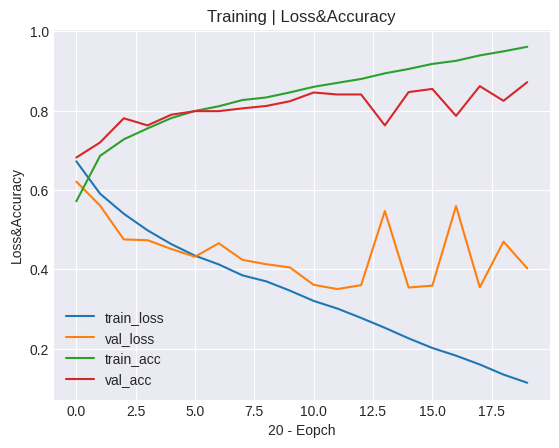

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8-darkgrid")
plt.figure()

epochs = 20

plt.plot(np.arange(0,epochs), history.history["loss"],label="train_loss")
plt.plot(np.arange(0,epochs), history.history["val_loss"],label="val_loss")

plt.plot(np.arange(0,epochs), history.history["acc"],label="train_acc")
plt.plot(np.arange(0,epochs), history.history["val_acc"],label="val_acc")

plt.title("Training | Loss&Accuracy")
plt.xlabel("20 - Eopch")
plt.ylabel("Loss&Accuracy")
plt.legend(loc="lower left") #labelların gösterilecegi konumunu belirleme


In [13]:
model.save("models/cat_dog_first.h5")

# PROBLEM: OVERFITTING
1. New Model
2. Data Augmentation

# Creating New Model

In [14]:
model_x = Sequential()

model_x.add(layers.Conv2D(32, (3,3), activation="relu", input_shape = (150,150,3)))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Conv2D(64, (3,3), activation="relu"))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Conv2D(128, (3,3), activation="relu"))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Conv2D(128, (3,3), activation="relu"))
model_x.add(layers.MaxPooling2D((2,2)))


model_x.add(layers.Flatten())
model_x.add(layers.Dropout(0.4))

model_x.add(layers.Dense(512,activation="relu"))
model_x.add(layers.Dense(1,activation="sigmoid"))

model_x.summary()

/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model_x.compile(loss = "binary_crossentropy",
                optimizer = optimizers.RMSprop(learning_rate = 1e-4), #ogrenme orani
                metrics = ["acc"]
              )

# Image Data Augmentation

In [16]:
train_datagen_x = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 45,
                                    width_shift_range = 0.3,
                                    height_shift_range = 0.3,
                                    shear_range = 0.3,
                                    zoom_range = 0.3,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    fill_mode = "nearest")

validation_datagen_x = ImageDataGenerator(rescale = 1./255,)

In [17]:
train_generator_x = train_datagen_x.flow_from_directory(train_directory,
                                                        target_size = (150,150),
                                                        batch_size = 16,
                                                        class_mode = "binary")

validation_generator_x = validation_datagen_x.flow_from_directory(train_directory,
                                                                  target_size = (150,150),
                                                                  batch_size = 16,
                                                                  class_mode = "binary")

Found 8005 images belonging to 2 classes.
Found 8005 images belonging to 2 classes.


# Training New Model

In [18]:
history_x = model_x.fit(train_generator_x,
                        steps_per_epoch = 100,
                        epochs = 100,
                        validation_data = validation_generator_x,
                        validation_steps = 50)

Epoch 1/100


/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 288ms/step - acc: 0.5021 - loss: 0.6981 - val_acc: 0.5088 - val_loss: 0.6904
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 255ms/step - acc: 0.4934 - loss: 0.6945 - val_acc: 0.5125 - val_loss: 0.6901
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 255ms/step - acc: 0.5201 - loss: 0.6915 - val_acc: 0.4988 - val_loss: 0.6930
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 255ms/step - acc: 0.5394 - loss: 0.6902 - val_acc: 0.5900 - val_loss: 0.6727
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 254ms/step - acc: 0.5755 - loss: 0.6797 - val_acc: 0.6125 - val_loss: 0.6609
Epoch 6/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - acc: 0.6875 - loss: 0.6427

2024-10-08 11:43:01.341431: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - acc: 0.6875 - loss: 0.6427 - val_acc: 0.5838 - val_loss: 0.6717
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 284ms/step - acc: 0.5887 - loss: 0.6778 - val_acc: 0.5775 - val_loss: 0.6685
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 271ms/step - acc: 0.5607 - loss: 0.6888 - val_acc: 0.5387 - val_loss: 0.6791
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 270ms/step - acc: 0.5725 - loss: 0.6700 - val_acc: 0.5987 - val_loss: 0.6541
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 272ms/step - acc: 0.5992 - loss: 0.6652 - val_acc: 0.6087 - val_loss: 0.6437
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - acc: 0.5856 - loss: 0.6647 - val_acc: 0.6000 - val_loss: 0.7126
Epoch 12/100


2024-10-08 11:45:19.142292: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - acc: 0.6250 - loss: 0.6358 - val_acc: 0.5537 - val_loss: 0.6621
Epoch 13/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 275ms/step - acc: 0.5917 - loss: 0.6600 - val_acc: 0.6212 - val_loss: 0.6490
Epoch 14/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - acc: 0.6051 - loss: 0.6504 - val_acc: 0.5113 - val_loss: 0.7357
Epoch 15/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - acc: 0.5766 - loss: 0.6687 - val_acc: 0.6338 - val_loss: 0.6401
Epoch 16/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - acc: 0.6306 - loss: 0.6441 - val_acc: 0.6037 - val_loss: 0.6585
Epoch 17/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - acc: 0.6244 - loss: 0.6449 - val_acc: 0.5550 - val_loss: 0.6810
Epoch 18/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - acc: 0.4375 - loss: 0.7656

2024-10-08 11:47:16.092914: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - acc: 0.4375 - loss: 0.7656 - val_acc: 0.5487 - val_loss: 0.6868
Epoch 19/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - acc: 0.6079 - loss: 0.6584 - val_acc: 0.6388 - val_loss: 0.6274
Epoch 20/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - acc: 0.6341 - loss: 0.6384 - val_acc: 0.6650 - val_loss: 0.6035
Epoch 21/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - acc: 0.6072 - loss: 0.6478 - val_acc: 0.6350 - val_loss: 0.6187
Epoch 22/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - acc: 0.6207 - loss: 0.6390 - val_acc: 0.6000 - val_loss: 0.6631
Epoch 23/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - acc: 0.6232 - loss: 0.6366 - val_acc: 0.6737 - val_loss: 0.6058
Epoch 24/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.6875 - loss: 0.6314 - val_acc: 0.6550 - val_loss: 0.6312
Epoch 25/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - acc: 0.6368 - loss: 0.6368 - val_acc: 0.6100 - val_loss: 0.6414
Epoch 26/100
100/100 ━━━━━━━━━━━━

2024-10-08 11:51:36.340649: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - acc: 0.6624 - loss: 0.6103 - val_acc: 0.6600 - val_loss: 0.6034
Epoch 35/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/step - acc: 0.6599 - loss: 0.6238 - val_acc: 0.5275 - val_loss: 0.9320
Epoch 36/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - acc: 0.3750 - loss: 0.7900 - val_acc: 0.6662 - val_loss: 0.6250
Epoch 37/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - acc: 0.6569 - loss: 0.6083 - val_acc: 0.6438 - val_loss: 0.6004
Epoch 38/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - acc: 0.6400 - loss: 0.6393 - val_acc: 0.7050 - val_loss: 0.5829
Epoch 39/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - acc: 0.6335 - loss: 0.6302 - val_acc: 0.6988 - val_loss: 0.5673
Epoch 40/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - acc: 0.6529 - loss: 0.6189 - val_acc: 0.6925 - val_loss: 0.5963
Epoch 41/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - acc: 0.6708 - loss: 0.6054 - val_acc: 0.7287 - val_loss: 0.5785
Epoch 42/100
100/100 ━━━━━━━━━━

2024-10-08 12:01:34.974564: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - acc: 0.6911 - loss: 0.5850 - val_acc: 0.7450 - val_loss: 0.5094
Epoch 68/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - acc: 0.6838 - loss: 0.5862 - val_acc: 0.7200 - val_loss: 0.5378
Epoch 69/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 267ms/step - acc: 0.6888 - loss: 0.5788 - val_acc: 0.7325 - val_loss: 0.5526
Epoch 70/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 289ms/step - acc: 0.6860 - loss: 0.5749 - val_acc: 0.7188 - val_loss: 0.5482
Epoch 71/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 241ms/step - acc: 0.7025 - loss: 0.5710 - val_acc: 0.7513 - val_loss: 0.5311
Epoch 72/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - acc: 0.5625 - loss: 0.6434 - val_acc: 0.6625 - val_loss: 0.5874
Epoch 73/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 291ms/step - acc: 0.7016 - loss: 0.5578 - val_acc: 0.7688 - val_loss: 0.5046
Epoch 74/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 249ms/step - acc: 0.6752 - loss: 0.5957 - val_acc: 0.7500 - val_loss: 0.5274
Epoch 75/100
100/100 ━━━━━━━━━━

# Visualization New Model

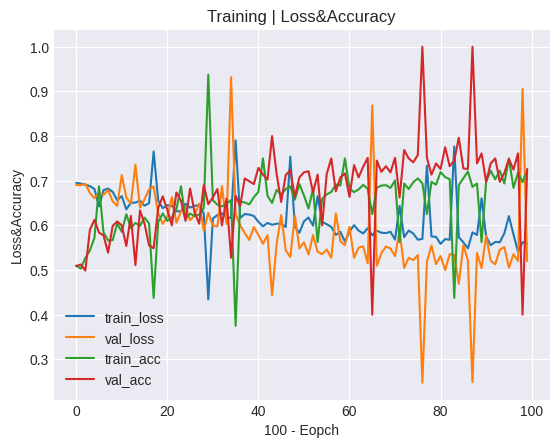

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8-darkgrid")
plt.figure()

epochs = 100

plt.plot(np.arange(0,epochs), history_x.history["loss"],label="train_loss")
plt.plot(np.arange(0,epochs), history_x.history["val_loss"],label="val_loss")

plt.plot(np.arange(0,epochs), history_x.history["acc"],label="train_acc")
plt.plot(np.arange(0,epochs), history_x.history["val_acc"],label="val_acc")

plt.title("Training | Loss&Accuracy")
plt.xlabel("100 - Eopch")
plt.ylabel("Loss&Accuracy")
plt.legend(loc="lower left") #labelların gösterilecegi konumunu belirleme


In [20]:
model_x.save("models/cat_dog_last.h5")

# Prediction

In [21]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np

In [22]:
model_path = "models/cat_dog_last.h5" 
image_path ="datasets/catdog/test/dogs/dog.4003.jpg" #4161

In [23]:
prediction_model = load_model(model_path)
test_images = load_img(image_path, target_size=(150,150))

<PIL.Image.Image image mode=RGB size=150x150 at 0x76A7A424E1D0>


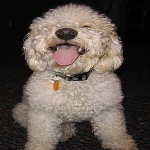

In [24]:
print(test_images)
test_images

In [25]:
test_images = img_to_array(test_images)
test_images.shape


(150, 150, 3)

In [26]:
test_images = np.expand_dims(test_images, axis=0)

In [27]:
test_images.shape

(1, 150, 150, 3)

In [28]:
train_generator_x.class_indices

{'cats': 0, 'dogs': 1}

In [29]:
result = prediction_model.predict(test_images)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[1.]], dtype=float32)

In [30]:
if result[0][0] > 0.5:
    label = "Dog"
    print("Prediction: This is a",label)

else:
    label = "Cat"
    print("Prediction: This is a",label)

Prediction: This is a Dog


In [32]:
import cv2

test_images = cv2.imread(image_path)

font = cv2.FONT_HERSHEY_COMPLEX
color = (255,255,0)
cv2.putText(test_images, label, (20,40), font, 1.0, color, 3)

cv2.imshow("Prediction:", test_images)
cv2.waitKey(0)
cv2.destroyAllWindows()